In [1]:
import numpy as np
import os


import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import itertools
import astropy.units as u

import astropy.constants as const
import scipy.stats
from ast import literal_eval
from matplotlib.patches import Patch

In [2]:
import sys

from s1s2_0311 import *
from read import *
from recoil_1223 import *
from plot_binned_detection_1d2d_0526 import *

In [3]:
def check_consecutive(l):
    return sorted(l)==list(range(min(l), max(l)+1))

In [4]:
def find_consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

# FIND OPTIMIZED REGION

In [5]:

folder_2d = '../nestpy_unbinned_unbound_thrd0'
nuclei_2d = 'Xenon'
footnote = 'thrd'
metallicity = 'high'
E_threshold_keV =0

# hep

['atmNu_CJPL_avg', 'dsnb', 'pp', 'Be7_384', 'Be7_861', 'CNO', 'pep', 'nubb', 'Kr85', 'Rn222']
(11,) (11,)
../nestpy_unbinned_unbound/S1S2_hep.csv True
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
hep 2.705850038455413 1 / (t yr)
number within binrange region =  2694258 fraction of counts within binrange region =  1.0 samebin?  True True
(10, 10) (11,) (11,)
(10, 10)
(11,) (11,)
../nestpy_unbinned_unbound_thrd0/S1S2_atmNu_CJPL_avg.csv True
NR
 ../real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
atmNu_CJPL_avg 0.03605074238375018 1 / (t yr)
number within binrange region =  3388846 fraction of counts within binrange region =  0.4491369988412561 samebin?  True True
(10, 10) (11,) (11,)
(10, 10)
../nestpy_unbinned_unbound_thrd0/S1S2_dsnb.csv True
NR
survival
dsnb 0.05463025667101728 1 / (t yr)
number within binrange region =  2732911 fraction of counts within binrange region =  0.8834228529830473 samebin?  True True
(10, 10) (11,) (11,)
(10, 10)
../nestpy_unb

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
hep E_threshold_keV =  0 2.705850038455413 1 / (t yr)
sim number =  10000000 
valid_dataf =  882768
number within binrange region =  368940 
xbins =  [1.  3.4] 
ybins =  [1.9  3.58] 
rates =  [0.09982963] 1 / (t yr) 
fraction of rate within binrange =  0.036893999999999996
number within binrange region =  393910 
xbins =  [3.4 5.8] 
ybins =  [1.9  3.58] 
rates =  [0.10658614] 1 / (t yr) 
fraction of rate within binrange =  0.039390999999999995
number within binrange region =  91462 
xbins =  [5.8 8.2] 
ybins =  [1.9  3.58] 
rates =  [0.02474825] 1 / (t yr) 
fraction of rate within binrange =  0.009146199999999998
number within binrange region =  19397 
xbins =  [ 8.2 10.6] 
ybins =  [2.11 3.58] 
rates =  [0.00524854] 1 / (t yr) 
fraction of rate within binrange =  0.0019397
number within binrange region =  3859 
xbins =  [10.6 13. ] 
ybins =  [2.53 3.58] 
rates =  [0.00104419] 1 / (t yr) 
fraction of rate within binrange

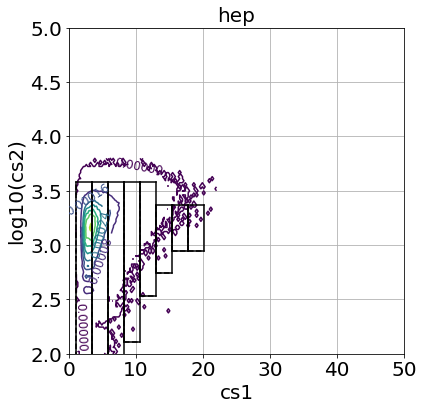

In [21]:
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']
optimized_bins_det = dict()

ratio_thrd = 1
_, pcles_null_wo8B, pcles_det, xbins_all, ybins_all = get_null_NR('hep', 'CJPL')
print(pcles_null_wo8B)
pcle = pcles_det[0]

rates_det_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
rates_null_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
rates_det = get_bin_regions(pcles_det, [xbins_all, ybins_all], rates_det_start, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = '../nestpy_unbinned_unbound', binnumber = [len(xbins_all), len(ybins_all)], 
                print_check = True)





xbins_centers = (xbins_all[1:]+xbins_all[:-1])/2
xbins_boundary = [[xbins_all[i], xbins_all[i+1]] for i in range(0, len(xbins_all)-1)]

ybins_centers = (ybins_all[1:]+ybins_all[:-1])/2
ybins_boundary = [[ybins_all[i], ybins_all[i+1]] for i in range(0, len(ybins_all)-1)]


rates_null_wo8B = get_bin_regions(pcles_null_wo8B, [xbins_all, ybins_all], rates_null_start, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = folder_2d, binnumber = [len(xbins_all), len(ybins_all)], 
                print_check = True)

ratio = rates_det/rates_null_wo8B
ratio[np.isnan(ratio)] = 0
ratio[ratio == -np.inf] = 0
ratio[ratio == np.inf] =0

good = ratio>1
xbins_good, ybins_good = np.where(good == True)

bins_groups = []
bins_ygrids_groups = []
for x_bin_index in sorted(set(xbins_good)):
    per_good = xbins_good == x_bin_index
    min_x_bin, max_x_bin = min(xbins_boundary[x_bin_index]), max(xbins_boundary[x_bin_index])
    
    consecutive_ybins_good = max(find_consecutive(ybins_good[per_good], stepsize=1), key=len)
    min_y_bin_index, max_y_bin_index = min(consecutive_ybins_good), max(consecutive_ybins_good) 
    min_y_bin, max_y_bin = min(ybins_boundary[min_y_bin_index]), max(ybins_boundary[max_y_bin_index])
 
    
    print('consecutive? ', check_consecutive(ybins_good[per_good]), 
      '\nlongest consecutive index part: ', consecutive_ybins_good,
          '\nfrom', min_y_bin_index, ' to ', max_y_bin_index
      )
    
    bins_ygrids = []
    for consecutive_ybin_good in consecutive_ybins_good:
        bin_ygrid = (min_x_bin, max_x_bin, 
                    round(min(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 
                    round(max(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 1, 1)
        
        bins_ygrids.append(bin_ygrid)
    print(bins_ygrids)
    bins_ygrids_groups.append(bins_ygrids)
    
    bin_group = (min_x_bin, max_x_bin, min_y_bin, max_y_bin, 1, 1)
    bins_groups.append(bin_group)
    
    
    
_, sim_rate_det = get_poisrdm_Rate(pcles_det, bins_groups,N = 1, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = folder_2d,plot = True, print_check = True, 
                                           plot_xlims = [0, 50], plot_ylims = [2, 5])
homogeneous = sim_rate_det>1e-4*sim_rate_det.unit
bin_terminate_idc = max(np.where(homogeneous)[0])+1
sim_rate_det[:bin_terminate_idc], len(sim_rate_det[:bin_terminate_idc])
bins_groups_homo = bins_groups[:bin_terminate_idc]
optimized_bins_det['hep'] = bins_groups_homo

In [23]:
optimized_grids_det = dict()

In [35]:
optimized_grids_det['hep'] = flatten(bins_ygrids_groups_homo)

In [26]:
file_name =  'optimized_consecutive_grids_thrd0_'+pcles_det[0]+'.csv'
file_name

'optimized_consecutive_grids_thrd0_hep.csv'

In [37]:
df = pd.DataFrame.from_dict(optimized_grids_det,orient='index').transpose()
df

,hep
0,"(1.0, 3.4, 1.9, 2.11, 1, 1)"
1,"(1.0, 3.4, 2.11, 2.32, 1, 1)"
2,"(1.0, 3.4, 2.32, 2.53, 1, 1)"
3,"(1.0, 3.4, 2.53, 2.74, 1, 1)"
4,"(1.0, 3.4, 2.74, 2.95, 1, 1)"
5,"(1.0, 3.4, 2.95, 3.16, 1, 1)"
6,"(1.0, 3.4, 3.16, 3.37, 1, 1)"
7,"(1.0, 3.4, 3.37, 3.58, 1, 1)"
8,"(3.4, 5.8, 1.9, 2.11, 1, 1)"
9,"(3.4, 5.8, 2.11, 2.32, 1, 1)"


In [39]:
df.to_csv(file_name)

In [22]:
bins_ygrids_groups_homo = bins_ygrids_groups[:bin_terminate_idc]
bins_ygrids_groups_homo

[[(1.0, 3.4, 1.9, 2.11, 1, 1),
  (1.0, 3.4, 2.11, 2.32, 1, 1),
  (1.0, 3.4, 2.32, 2.53, 1, 1),
  (1.0, 3.4, 2.53, 2.74, 1, 1),
  (1.0, 3.4, 2.74, 2.95, 1, 1),
  (1.0, 3.4, 2.95, 3.16, 1, 1),
  (1.0, 3.4, 3.16, 3.37, 1, 1),
  (1.0, 3.4, 3.37, 3.58, 1, 1)],
 [(3.4, 5.8, 1.9, 2.11, 1, 1),
  (3.4, 5.8, 2.11, 2.32, 1, 1),
  (3.4, 5.8, 2.32, 2.53, 1, 1),
  (3.4, 5.8, 2.53, 2.74, 1, 1),
  (3.4, 5.8, 2.74, 2.95, 1, 1),
  (3.4, 5.8, 2.95, 3.16, 1, 1),
  (3.4, 5.8, 3.16, 3.37, 1, 1),
  (3.4, 5.8, 3.37, 3.58, 1, 1)],
 [(5.8, 8.2, 1.9, 2.11, 1, 1),
  (5.8, 8.2, 2.11, 2.32, 1, 1),
  (5.8, 8.2, 2.32, 2.53, 1, 1),
  (5.8, 8.2, 2.53, 2.74, 1, 1),
  (5.8, 8.2, 2.74, 2.95, 1, 1),
  (5.8, 8.2, 2.95, 3.16, 1, 1),
  (5.8, 8.2, 3.16, 3.37, 1, 1),
  (5.8, 8.2, 3.37, 3.58, 1, 1)],
 [(8.2, 10.6, 2.11, 2.32, 1, 1),
  (8.2, 10.6, 2.32, 2.53, 1, 1),
  (8.2, 10.6, 2.53, 2.74, 1, 1),
  (8.2, 10.6, 2.74, 2.95, 1, 1),
  (8.2, 10.6, 2.95, 3.16, 1, 1),
  (8.2, 10.6, 3.16, 3.37, 1, 1),
  (8.2, 10.6, 3.37, 3.58, 1, 1)],


In [9]:
bins_groups_homo

[(1.0, 3.4, 1.9, 3.58, 1, 1),
 (3.4, 5.8, 1.9, 3.58, 1, 1),
 (5.8, 8.2, 1.9, 3.58, 1, 1),
 (8.2, 10.6, 2.11, 3.58, 1, 1),
 (10.6, 13.0, 2.5300000000000002, 3.58, 1, 1)]

In [9]:
bins_groups_homo

[(1.0, 3.4, 1.9, 3.58, 1, 1),
 (3.4, 5.8, 1.9, 3.58, 1, 1),
 (5.8, 8.2, 1.9, 3.58, 1, 1),
 (8.2, 10.6, 2.11, 3.58, 1, 1),
 (10.6, 13.0, 2.5300000000000002, 3.58, 1, 1)]

In [10]:
df = pd.DataFrame.from_dict(optimized_bins_det,orient='index').transpose()
df

,hep
0,"(1.0, 3.4, 1.9, 3.58, 1, 1)"
1,"(3.4, 5.8, 1.9, 3.58, 1, 1)"
2,"(5.8, 8.2, 1.9, 3.58, 1, 1)"
3,"(8.2, 10.6, 2.11, 3.58, 1, 1)"
4,"(10.6, 13.0, 2.5300000000000002, 3.58, 1, 1)"


In [11]:
file_name =  'optimized_consecutive_binning_thrd0_'+pcles_det[0]+'.csv'
file_name

'optimized_consecutive_binning_thrd0_hep.csv'

In [12]:
df.to_csv(file_name)

# dsnb

['dsnb'] ['hep', '8B', 'pp', 'Be7_384', 'Be7_861', 'CNO', 'pep', 'nubb', 'Kr85', 'Rn222']
(91,) (81,)
../nestpy_unbinned_unbound_thrd0/S1S2_dsnb.csv True
NR
survival
dsnb 0.05463025667101728 1 / (t yr)
number within binrange region =  3093548 fraction of counts within binrange region =  1.0 samebin?  True True
(90, 80) (91,) (81,)
(90, 80)
(91,) (81,)
../nestpy_unbinned_unbound_thrd0/S1S2_hep.csv True
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
hep 2.705850038455413 1 / (t yr)
number within binrange region =  882767 fraction of counts within binrange region =  0.999998867199536 samebin?  True True
(90, 80) (91,) (81,)
(90, 80)
../nestpy_unbinned_unbound_thrd0/S1S2_8B.csv True
NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
8B 951.8648814503732 1 / (t yr)
number within binrange region =  207280 fraction of counts within binrange region =  1.0 samebin?  True True
(90, 80) (91,) (81,)
(90, 80)
../nestpy_unbinned_unbound_thrd0/S1S2_pp.csv True
ER
else

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
survival
dsnb E_threshold_keV =  0 0.05463025667101728 1 / (t yr)
sim number =  10000006 
valid_dataf =  3093548
number within binrange region =  196496 
xbins =  [ 9. 13.] 
ybins =  [3.52   3.7225] 
rates =  [0.00107346] 1 / (t yr) 
fraction of rate within binrange =  0.019649588210247076
number within binrange region =  171424 
xbins =  [13. 17.] 
ybins =  [3.41875 3.75625] 
rates =  [0.00093649] 1 / (t yr) 
fraction of rate within binrange =  0.01714238971456617
number within binrange region =  20798 
xbins =  [17. 21.] 
ybins =  [3.35125 3.5875 ] 
rates =  [0.00011362] 1 / (t yr) 
fraction of rate within binrange =  0.002079798752120749
number within binrange region =  6951 
xbins =  [21. 25.] 
ybins =  [3.55375 3.62125] 
rates =  [3.79734686e-05] 1 / (t yr) 
fraction of rate within binrange =  0.0006950995829402502
number within binrange region =  5147 
xbins =  [33. 37.] 
ybins =  [3.82375 3.8575 ] 
rates =  [2.81181762e-05] 1 / (t yr) 
fraction of rate within binrange =  0.00

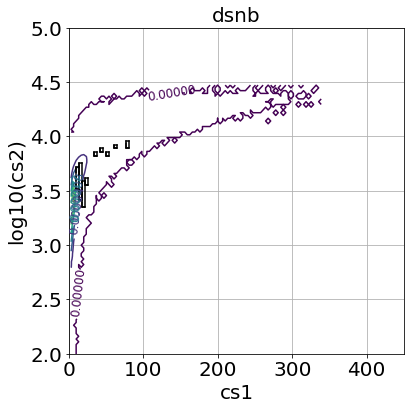

In [7]:
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']
optimized_bins_det = dict()
optimized_grids_det = dict()


ratio_thrd = 1
_, pcles_null_woatm, pcles_det, xbins_all, ybins_all = get_null_NR('dsnb', 'CJPL')
print(pcles_det, pcles_null_woatm)
pcle = pcles_det[0]

rates_det_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
rates_null_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
rates_det = get_bin_regions(pcles_det, [xbins_all, ybins_all], rates_det_start, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = folder_2d, binnumber = [len(xbins_all), len(ybins_all)], 
                print_check = True)





xbins_centers = (xbins_all[1:]+xbins_all[:-1])/2
xbins_boundary = [[xbins_all[i], xbins_all[i+1]] for i in range(0, len(xbins_all)-1)]

ybins_centers = (ybins_all[1:]+ybins_all[:-1])/2
ybins_boundary = [[ybins_all[i], ybins_all[i+1]] for i in range(0, len(ybins_all)-1)]


rates_null_woatm = get_bin_regions(pcles_null_woatm, [xbins_all, ybins_all], rates_null_start, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = folder_2d, binnumber = [len(xbins_all), len(ybins_all)], 
                print_check = True)

ratio = rates_det/rates_null_woatm
ratio[np.isnan(ratio)] = 0
ratio[ratio == -np.inf] = 0
ratio[ratio == np.inf] = 0

good = ratio>1
xbins_good, ybins_good = np.where(good == True)

bins_groups = []
bins_ygrids_groups = []
for x_bin_index in sorted(set(xbins_good)):
    per_good = xbins_good == x_bin_index
    min_x_bin, max_x_bin = min(xbins_boundary[x_bin_index]), max(xbins_boundary[x_bin_index])

    consecutive_ybins_good = max(find_consecutive(ybins_good[per_good], stepsize=1), key=len)
    min_y_bin_index, max_y_bin_index = min(consecutive_ybins_good), max(consecutive_ybins_good) 
    min_y_bin, max_y_bin = min(ybins_boundary[min_y_bin_index]), max(ybins_boundary[max_y_bin_index])
 
    
    print('consecutive? ', check_consecutive(ybins_good[per_good]), 
      '\nlongest consecutive index part: ', consecutive_ybins_good,
          '\nfrom', min_y_bin_index, ' to ', max_y_bin_index
      )
    
    bins_ygrids = []
    for consecutive_ybin_good in consecutive_ybins_good:
        bin_ygrid = (min_x_bin, max_x_bin, 
                    round(min(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 
                    round(max(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 1, 1)
        
        bins_ygrids.append(bin_ygrid)
    print(bins_ygrids)
    bins_ygrids_groups.append(bins_ygrids)
    
    
    
    bin_group = (min_x_bin, max_x_bin, min_y_bin, max_y_bin, 1, 1)
    bins_groups.append(bin_group)
    
_, sim_rate_det = get_poisrdm_Rate(pcles_det, bins_groups,N = 1, 
                 nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                 folder_2d = folder_2d,plot = True, print_check = True, 
                                           plot_xlims = [0, 450], plot_ylims = [2, 5])
homogeneous = sim_rate_det>1e-4*sim_rate_det.unit
bin_terminate_idc = max(np.where(homogeneous)[0])+1
sim_rate_det[:bin_terminate_idc], len(sim_rate_det[:bin_terminate_idc])
bins_groups_homo = bins_groups[:bin_terminate_idc]
bins_ygrids_groups_homo = bins_ygrids_groups[:bin_terminate_idc]


optimized_bins_det['dsnb'] = bins_groups_homo
optimized_grids_det['dsnb'] = flatten(bins_ygrids_groups_homo)

In [12]:
dfgrid = pd.DataFrame.from_dict(optimized_grids_det,orient='index').transpose()
dfgrid

,dsnb
0,"(9.0, 13.0, 3.52, 3.55375, 1, 1)"
1,"(9.0, 13.0, 3.55375, 3.5875, 1, 1)"
2,"(9.0, 13.0, 3.5875, 3.62125, 1, 1)"
3,"(9.0, 13.0, 3.62125, 3.655, 1, 1)"
4,"(9.0, 13.0, 3.655, 3.68875, 1, 1)"
5,"(9.0, 13.0, 3.68875, 3.7225, 1, 1)"
6,"(13.0, 17.0, 3.41875, 3.4525, 1, 1)"
7,"(13.0, 17.0, 3.4525, 3.48625, 1, 1)"
8,"(13.0, 17.0, 3.48625, 3.52, 1, 1)"
9,"(13.0, 17.0, 3.52, 3.55375, 1, 1)"


In [10]:
df = pd.DataFrame.from_dict(optimized_bins_det,orient='index').transpose()
df

,dsnb
0,"(9.0, 13.0, 3.5199999999999996, 3.722499999999..."
1,"(13.0, 17.0, 3.4187499999999997, 3.75624999999..."
2,"(17.0, 21.0, 3.3512499999999994, 3.58749999999..."


In [11]:
dsnb_file_name =  'optimized_consecutive_binning_thrd0_'+str(pcles_det[0])+'.csv'
dsnb_file_name

'optimized_consecutive_binning_thrd0_dsnb.csv'

In [13]:
dsnb_file_grid_name =  'optimized_consecutive_grids_thrd0_'+pcles_det[0]+'.csv'
dsnb_file_grid_name

'optimized_consecutive_grids_thrd0_dsnb.csv'

In [14]:
dfgrid.to_csv(dsnb_file_grid_name)

In [12]:
df.to_csv(dsnb_file_name)

# atmNu

(101,) (101,)
../nestpy_unbinned_unbound_thrd0/S1S2_atmNu_CJPL_avg.csv True
NR
 ../real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
atmNu_CJPL_avg 0.03605074238375018 1 / (t yr)
number within binrange region =  7545185 fraction of counts within binrange region =  0.99999284316905 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
(101,) (101,)
../nestpy_unbinned_unbound_thrd0/S1S2_dsnb.csv True
NR
survival
dsnb 0.05463025667101728 1 / (t yr)
number within binrange region =  3093460 fraction of counts within binrange region =  0.9999715536982132 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_hep.csv True
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
hep 2.705850038455413 1 / (t yr)
number within binrange region =  882582 fraction of counts within binrange region =  0.999789299113697 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_8B.csv True
NR
else
 ../real_d

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
 ../real_data_nest/pdf/atmNu_CJPL_avg_NR_Xenon_pdf.txt
survival
atmNu_CJPL_avg E_threshold_keV =  0 0.03605074238375018 1 / (t yr)
sim number =  10000000 
valid_dataf =  7545239
number within binrange region =  45233 
xbins =  [ 9. 13.] 
ybins =  [3.647 3.674] 
rates =  [0.00016307] 1 / (t yr) 
fraction of rate within binrange =  0.0045233
number within binrange region =  181474 
xbins =  [13. 17.] 
ybins =  [3.566 3.701] 
rates =  [0.00065423] 1 / (t yr) 
fraction of rate within binrange =  0.018147399999999998
number within binrange region =  298532 
xbins =  [17. 21.] 
ybins =  [3.431 3.809] 
rates =  [0.00107623] 1 / (t yr) 
fraction of rate within binrange =  0.029853199999999996
number within binrange region =  206754 
xbins =  [21. 25.] 
ybins =  [3.35  3.809] 
rates =  [0.00074536] 1 / (t yr) 
fraction of rate within binrange =  0.0206754
number within binrange region =  170209 
xbins =  [25. 29.] 
ybins =  [3.296 3.836] 
rates =  [0.00061362] 1 / (t yr) 
fraction of rate wi

number within binrange region =  471 
xbins =  [201. 205.] 
ybins =  [4.133 4.187] 
rates =  [1.69798997e-06] 1 / (t yr) 
fraction of rate within binrange =  4.709999999999999e-05
number within binrange region =  632 
xbins =  [205. 209.] 
ybins =  [4.187 4.214] 
rates =  [2.27840692e-06] 1 / (t yr) 
fraction of rate within binrange =  6.319999999999999e-05
number within binrange region =  516 
xbins =  [209. 213.] 
ybins =  [4.187 4.214] 
rates =  [1.86021831e-06] 1 / (t yr) 
fraction of rate within binrange =  5.1599999999999994e-05
number within binrange region =  592 
xbins =  [213. 217.] 
ybins =  [4.16  4.214] 
rates =  [2.13420395e-06] 1 / (t yr) 
fraction of rate within binrange =  5.919999999999999e-05
number within binrange region =  341 
xbins =  [217. 221.] 
ybins =  [4.187 4.214] 
rates =  [1.22933032e-06] 1 / (t yr) 
fraction of rate within binrange =  3.4099999999999995e-05
number within binrange region =  589 
xbins =  [221. 225.] 
ybins =  [4.214 4.241] 
rates =  [2.12

ER
 ../real_data_nest/pdf/Kr85_ER_Xenon_pdf.txt
survival
Kr85 608.0808376985507 1 / (t yr)
number within binrange region =  316347 fraction of counts within binrange region =  0.035924396229350515 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_Rn222.csv True
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
survival
Rn222 1738.646991167773 1 / (t yr)
number within binrange region =  3124 fraction of counts within binrange region =  0.0003548012709699306 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
consecutive?  True 
longest consecutive index part:  [60 61] 
from 60  to  61
[(9.0, 13.0, 3.62, 3.647, 1, 1), (9.0, 13.0, 3.647, 3.674, 1, 1)]
consecutive?  True 
longest consecutive index part:  [56 57 58 59 60 61 62 63 64] 
from 56  to  64
[(13.0, 17.0, 3.512, 3.539, 1, 1), (13.0, 17.0, 3.539, 3.566, 1, 1), (13.0, 17.0, 3.566, 3.593, 1, 1), (13.0, 17.0, 3.593, 3.62, 1, 1), (13.0, 17.0, 3.62, 3.647, 1, 1), (13.0, 17.0, 3.647, 3.674, 1

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
 ../real_data_nest/pdf/atmNu_Kamioka_avg_NR_Xenon_pdf.txt
survival
atmNu_Kamioka_avg E_threshold_keV =  0 0.04359758767449255 1 / (t yr)
sim number =  10000000 
valid_dataf =  7515445
number within binrange region =  92298 
xbins =  [ 9. 13.] 
ybins =  [3.62  3.674] 
rates =  [0.0004024] 1 / (t yr) 
fraction of rate within binrange =  0.009229800000000002
number within binrange region =  308207 
xbins =  [13. 17.] 
ybins =  [3.512 3.755] 
rates =  [0.00134371] 1 / (t yr) 
fraction of rate within binrange =  0.030820700000000003
number within binrange region =  300006 
xbins =  [17. 21.] 
ybins =  [3.404 3.809] 
rates =  [0.00130795] 1 / (t yr) 
fraction of rate within binrange =  0.0300006
number within binrange region =  206968 
xbins =  [21. 25.] 
ybins =  [3.35  3.809] 
rates =  [0.00090233] 1 / (t yr) 
fraction of rate within binrange =  0.0206968
number within binrange region =  170276 
xbins =  [25. 29.] 
ybins =  [3.296 3.836] 
rates =  [0.00074236] 1 / (t yr) 
fraction of ra

number within binrange region =  433 
xbins =  [201. 205.] 
ybins =  [4.133 4.187] 
rates =  [1.88777555e-06] 1 / (t yr) 
fraction of rate within binrange =  4.33e-05
number within binrange region =  631 
xbins =  [205. 209.] 
ybins =  [4.187 4.214] 
rates =  [2.75100778e-06] 1 / (t yr) 
fraction of rate within binrange =  6.31e-05
number within binrange region =  496 
xbins =  [209. 213.] 
ybins =  [4.187 4.214] 
rates =  [2.16244035e-06] 1 / (t yr) 
fraction of rate within binrange =  4.96e-05
number within binrange region =  528 
xbins =  [213. 217.] 
ybins =  [4.16  4.214] 
rates =  [2.30195263e-06] 1 / (t yr) 
fraction of rate within binrange =  5.28e-05
number within binrange region =  322 
xbins =  [217. 221.] 
ybins =  [4.187 4.214] 
rates =  [1.40384232e-06] 1 / (t yr) 
fraction of rate within binrange =  3.2200000000000003e-05
number within binrange region =  550 
xbins =  [221. 225.] 
ybins =  [4.214 4.241] 
rates =  [2.39786732e-06] 1 / (t yr) 
fraction of rate within binra

ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
survival
Rn222 1738.646991167773 1 / (t yr)
number within binrange region =  3124 fraction of counts within binrange region =  0.0003548012709699306 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
consecutive?  True 
longest consecutive index part:  [58 59 60 61 62 63] 
from 58  to  63
[(9.0, 13.0, 3.566, 3.593, 1, 1), (9.0, 13.0, 3.593, 3.62, 1, 1), (9.0, 13.0, 3.62, 3.647, 1, 1), (9.0, 13.0, 3.647, 3.674, 1, 1), (9.0, 13.0, 3.674, 3.701, 1, 1), (9.0, 13.0, 3.701, 3.728, 1, 1)]
consecutive?  True 
longest consecutive index part:  [55 56 57 58 59 60 61 62 63 64] 
from 55  to  64
[(13.0, 17.0, 3.485, 3.512, 1, 1), (13.0, 17.0, 3.512, 3.539, 1, 1), (13.0, 17.0, 3.539, 3.566, 1, 1), (13.0, 17.0, 3.566, 3.593, 1, 1), (13.0, 17.0, 3.593, 3.62, 1, 1), (13.0, 17.0, 3.62, 3.647, 1, 1), (13.0, 17.0, 3.647, 3.674, 1, 1), (13.0, 17.0, 3.674, 3.701, 1, 1), (13.0, 17.0, 3.701, 3.728, 1, 1), (13.0, 17.0, 3.728, 3.755, 1, 1)]
consecutive?  Fals

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
 ../real_data_nest/pdf/atmNu_LNGS_avg_NR_Xenon_pdf.txt
survival
atmNu_LNGS_avg E_threshold_keV =  0 0.0553093535195742 1 / (t yr)
sim number =  10000000 
valid_dataf =  7521885
number within binrange region =  265217 
xbins =  [ 9. 13.] 
ybins =  [3.566 3.728] 
rates =  [0.0014669] 1 / (t yr) 
fraction of rate within binrange =  0.026521700000000002
number within binrange region =  320845 
xbins =  [13. 17.] 
ybins =  [3.485 3.755] 
rates =  [0.00177457] 1 / (t yr) 
fraction of rate within binrange =  0.0320845
number within binrange region =  301533 
xbins =  [17. 21.] 
ybins =  [3.35  3.809] 
rates =  [0.00166776] 1 / (t yr) 
fraction of rate within binrange =  0.030153300000000004
number within binrange region =  207715 
xbins =  [21. 25.] 
ybins =  [3.35  3.809] 
rates =  [0.00114886] 1 / (t yr) 
fraction of rate within binrange =  0.020771500000000002
number within binrange region =  203835 
xbins =  [25. 29.] 
ybins =  [3.296 3.863] 
rates =  [0.0011274] 1 / (t yr) 
fraction o

number within binrange region =  422 
xbins =  [197. 201.] 
ybins =  [4.16  4.187] 
rates =  [2.33405472e-06] 1 / (t yr) 
fraction of rate within binrange =  4.220000000000001e-05
number within binrange region =  442 
xbins =  [201. 205.] 
ybins =  [4.133 4.187] 
rates =  [2.44467343e-06] 1 / (t yr) 
fraction of rate within binrange =  4.4200000000000004e-05
number within binrange region =  589 
xbins =  [205. 209.] 
ybins =  [4.187 4.214] 
rates =  [3.25772092e-06] 1 / (t yr) 
fraction of rate within binrange =  5.89e-05
number within binrange region =  508 
xbins =  [209. 213.] 
ybins =  [4.187 4.214] 
rates =  [2.80971516e-06] 1 / (t yr) 
fraction of rate within binrange =  5.08e-05
number within binrange region =  602 
xbins =  [213. 217.] 
ybins =  [4.16  4.214] 
rates =  [3.32962308e-06] 1 / (t yr) 
fraction of rate within binrange =  6.0200000000000006e-05
number within binrange region =  330 
xbins =  [217. 221.] 
ybins =  [4.187 4.214] 
rates =  [1.82520867e-06] 1 / (t yr) 
fr

ER
survival
nubb 134197.54712165002 1 / (t yr)
number within binrange region =  1072 fraction of counts within binrange region =  0.00012170890658285101 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_Kr85.csv True
ER
 ../real_data_nest/pdf/Kr85_ER_Xenon_pdf.txt
survival
Kr85 608.0808376985507 1 / (t yr)
number within binrange region =  316347 fraction of counts within binrange region =  0.035924396229350515 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_Rn222.csv True
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
survival
Rn222 1738.646991167773 1 / (t yr)
number within binrange region =  3124 fraction of counts within binrange region =  0.0003548012709699306 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
consecutive?  True 
longest consecutive index part:  [57 58 59 60 61 62 63] 
from 57  to  63
[(9.0, 13.0, 3.539, 3.566, 1, 1), (9.0, 13.0, 3.566, 3.593, 1, 1), (9.0, 13.0, 3.593, 

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
 ../real_data_nest/pdf/atmNu_SURF_avg_NR_Xenon_pdf.txt
survival
atmNu_SURF_avg E_threshold_keV =  0 0.07489834482058429 1 / (t yr)
sim number =  10000000 
valid_dataf =  7505747
number within binrange region =  309481 
xbins =  [ 9. 13.] 
ybins =  [3.539 3.728] 
rates =  [0.00231796] 1 / (t yr) 
fraction of rate within binrange =  0.0309481
number within binrange region =  340841 
xbins =  [13. 17.] 
ybins =  [3.431 3.755] 
rates =  [0.00255284] 1 / (t yr) 
fraction of rate within binrange =  0.0340841
number within binrange region =  302887 
xbins =  [17. 21.] 
ybins =  [3.323 3.809] 
rates =  [0.00226857] 1 / (t yr) 
fraction of rate within binrange =  0.0302887
number within binrange region =  243493 
xbins =  [21. 25.] 
ybins =  [3.35  3.836] 
rates =  [0.00182372] 1 / (t yr) 
fraction of rate within binrange =  0.0243493
number within binrange region =  203953 
xbins =  [25. 29.] 
ybins =  [3.296 3.863] 
rates =  [0.00152757] 1 / (t yr) 
fraction of rate within binrange =  0.02

number within binrange region =  442 
xbins =  [201. 205.] 
ybins =  [4.133 4.187] 
rates =  [3.31050684e-06] 1 / (t yr) 
fraction of rate within binrange =  4.4200000000000004e-05
number within binrange region =  605 
xbins =  [205. 209.] 
ybins =  [4.187 4.214] 
rates =  [4.53134986e-06] 1 / (t yr) 
fraction of rate within binrange =  6.050000000000001e-05
number within binrange region =  434 
xbins =  [209. 213.] 
ybins =  [4.187 4.214] 
rates =  [3.25058817e-06] 1 / (t yr) 
fraction of rate within binrange =  4.3400000000000005e-05
number within binrange region =  558 
xbins =  [213. 217.] 
ybins =  [4.16  4.214] 
rates =  [4.17932764e-06] 1 / (t yr) 
fraction of rate within binrange =  5.5799999999999994e-05
number within binrange region =  285 
xbins =  [217. 221.] 
ybins =  [4.187 4.214] 
rates =  [2.13460283e-06] 1 / (t yr) 
fraction of rate within binrange =  2.85e-05
number within binrange region =  526 
xbins =  [221. 225.] 
ybins =  [4.214 4.241] 
rates =  [3.93965294e-06] 

number within binrange region =  1072 fraction of counts within binrange region =  0.00012170890658285101 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_Kr85.csv True
ER
 ../real_data_nest/pdf/Kr85_ER_Xenon_pdf.txt
survival
Kr85 608.0808376985507 1 / (t yr)
number within binrange region =  316347 fraction of counts within binrange region =  0.035924396229350515 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
../nestpy_unbinned_unbound_thrd0/S1S2_Rn222.csv True
ER
 ../real_data_nest/pdf/Rn222_ER_Xenon_pdf.txt
survival
Rn222 1738.646991167773 1 / (t yr)
number within binrange region =  3124 fraction of counts within binrange region =  0.0003548012709699306 samebin?  True True
(100, 100) (101,) (101,)
(100, 100)
consecutive?  False 
longest consecutive index part:  [57 58 59 60 61 62 63] 
from 57  to  63
[(9.0, 13.0, 3.539, 3.566, 1, 1), (9.0, 13.0, 3.566, 3.593, 1, 1), (9.0, 13.0, 3.593, 3.62, 1, 1), (9.0, 13.0, 3.62, 3.647, 1, 1), (

/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/echo/.local/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


NR
 ../real_data_nest/pdf/atmNu_SNOlab_avg_NR_Xenon_pdf.txt
survival
atmNu_SNOlab_avg E_threshold_keV =  0 0.0755508122626306 1 / (t yr)
sim number =  10000000 
valid_dataf =  7516624
number within binrange region =  307378 
xbins =  [ 9. 13.] 
ybins =  [3.539 3.728] 
rates =  [0.00232227] 1 / (t yr) 
fraction of rate within binrange =  0.030737800000000003
number within binrange region =  341137 
xbins =  [13. 17.] 
ybins =  [3.431 3.755] 
rates =  [0.00257732] 1 / (t yr) 
fraction of rate within binrange =  0.0341137
number within binrange region =  303362 
xbins =  [17. 21.] 
ybins =  [3.35  3.809] 
rates =  [0.00229192] 1 / (t yr) 
fraction of rate within binrange =  0.030336199999999997
number within binrange region =  244130 
xbins =  [21. 25.] 
ybins =  [3.269 3.836] 
rates =  [0.00184442] 1 / (t yr) 
fraction of rate within binrange =  0.024413
number within binrange region =  203499 
xbins =  [25. 29.] 
ybins =  [3.296 3.863] 
rates =  [0.00153745] 1 / (t yr) 
fraction of rate

number within binrange region =  456 
xbins =  [201. 205.] 
ybins =  [4.133 4.187] 
rates =  [3.44511704e-06] 1 / (t yr) 
fraction of rate within binrange =  4.56e-05
number within binrange region =  582 
xbins =  [205. 209.] 
ybins =  [4.187 4.214] 
rates =  [4.39705727e-06] 1 / (t yr) 
fraction of rate within binrange =  5.8200000000000005e-05
number within binrange region =  465 
xbins =  [209. 213.] 
ybins =  [4.187 4.214] 
rates =  [3.51311277e-06] 1 / (t yr) 
fraction of rate within binrange =  4.65e-05
number within binrange region =  586 
xbins =  [213. 217.] 
ybins =  [4.16  4.214] 
rates =  [4.4272776e-06] 1 / (t yr) 
fraction of rate within binrange =  5.86e-05
number within binrange region =  297 
xbins =  [217. 221.] 
ybins =  [4.187 4.214] 
rates =  [2.24385912e-06] 1 / (t yr) 
fraction of rate within binrange =  2.97e-05
number within binrange region =  560 
xbins =  [221. 225.] 
ybins =  [4.214 4.241] 
rates =  [4.23084549e-06] 1 / (t yr) 
fraction of rate within binran

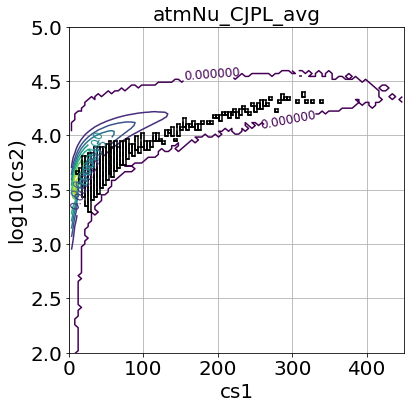

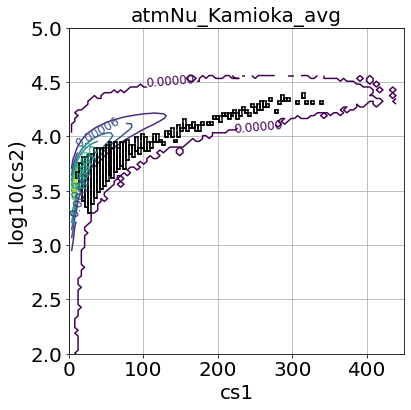

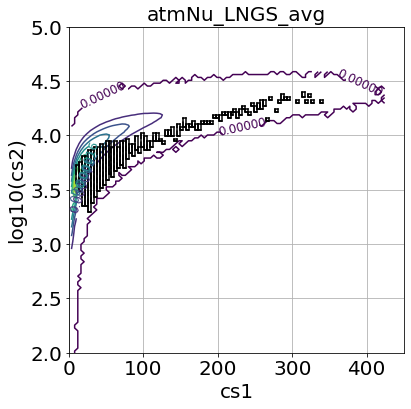

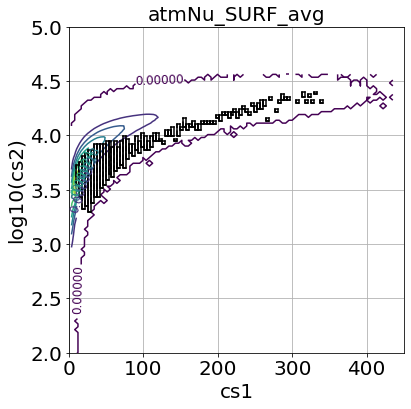

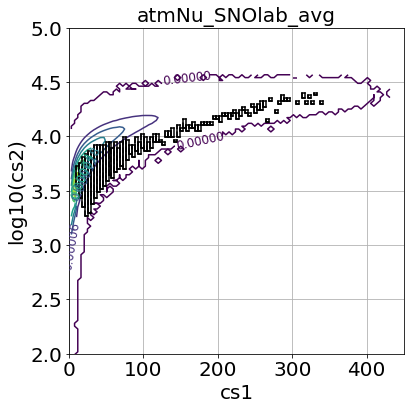

In [6]:
detectors = ['CJPL', 'Kamioka', 'LNGS', 'SURF', 'SNOlab']
optimized_bins_det = dict()
optimized_grids_det = dict()

ratio_thrds = [1,1,1,1,1]
for detector, ratio_thrd in zip(detectors, ratio_thrds):
    pcles_null, pcles_det, xbins_all, ybins_all = get_null_NR('atm', detector)
    
    pcle = pcles_det[0]
    
    rates_atm_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
    rates_null_start = np.zeros((len(xbins_all)-1, len(ybins_all)-1))*(1/u.tonne/u.yr)
    rates_atm = get_bin_regions(pcles_det, [xbins_all, ybins_all], rates_atm_start, 
                     nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                     folder_2d = folder_2d, binnumber = [len(xbins_all), len(ybins_all)], 
                    print_check = True)
    
    
    
    
    
    xbins_centers = (xbins_all[1:]+xbins_all[:-1])/2
    xbins_boundary = [[xbins_all[i], xbins_all[i+1]] for i in range(0, len(xbins_all)-1)]

    ybins_centers = (ybins_all[1:]+ybins_all[:-1])/2
    ybins_boundary = [[ybins_all[i], ybins_all[i+1]] for i in range(0, len(ybins_all)-1)]
    
    
    rates_null = get_bin_regions(pcles_null, [xbins_all, ybins_all], rates_null_start, 
                     nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV =E_threshold_keV, metallicity = 'high',
                     folder_2d = folder_2d, binnumber = [len(xbins_all), len(ybins_all)], 
                    print_check = True)
    
    ratios = rates_atm/rates_null
    ratios[np.isnan(ratios)] = 0
    ratios[ratios == -np.inf] = 0
    ratios[ratios == np.inf] = 0
    
    good = ratios>1
    
    xbins_good, ybins_good = np.where(good == True)
    
    bins_groups = []
    bins_ygrids_groups = []
    for x_bin_index in sorted(set(xbins_good)):
        per_good = xbins_good == x_bin_index
        min_x_bin, max_x_bin = min(xbins_boundary[x_bin_index]), max(xbins_boundary[x_bin_index])

        consecutive_ybins_good = max(find_consecutive(ybins_good[per_good], stepsize=1), key=len)
        min_y_bin_index, max_y_bin_index = min(consecutive_ybins_good), max(consecutive_ybins_good) 
        min_y_bin, max_y_bin = min(ybins_boundary[min_y_bin_index]), max(ybins_boundary[max_y_bin_index])


        print('consecutive? ', check_consecutive(ybins_good[per_good]), 
          '\nlongest consecutive index part: ', consecutive_ybins_good,
              '\nfrom', min_y_bin_index, ' to ', max_y_bin_index
          )

        
        bins_ygrids = []
        for consecutive_ybin_good in consecutive_ybins_good:
            bin_ygrid = (min_x_bin, max_x_bin, 
                        round(min(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 
                        round(max(np.array(ybins_boundary)[consecutive_ybin_good]), 5), 1, 1)

            bins_ygrids.append(bin_ygrid)
        print(bins_ygrids)
        bins_ygrids_groups.append(bins_ygrids)


    
    
    
        bin_group = (min_x_bin, max_x_bin, min_y_bin, max_y_bin, 1, 1)
        bins_groups.append(bin_group)
        
    _, sim_rate_det = get_poisrdm_Rate(pcles_det, bins_groups,N = 1, 
                     nuclei_2d = 'Xenon', footnote = 'thrd', E_threshold_keV = E_threshold_keV, metallicity = 'high',
                     folder_2d = folder_2d,plot = True, print_check = True, 
                                               plot_xlims = [0, 450], plot_ylims = [2, 5])
    homogeneous = sim_rate_det>1e-4*sim_rate_det.unit
    bin_terminate_idc = max(np.where(homogeneous)[0])+1
    sim_rate_det[:bin_terminate_idc], len(sim_rate_det[:bin_terminate_idc])
    bins_groups_homo = bins_groups[:bin_terminate_idc]
    bins_ygrids_groups_homo = bins_ygrids_groups[:bin_terminate_idc]

    optimized_bins_det[detector] = bins_groups_homo
    optimized_grids_det[detector] = flatten(bins_ygrids_groups_homo)

In [7]:
dfgrid = pd.DataFrame.from_dict(optimized_grids_det,orient='index').transpose()
dfgrid

,CJPL,Kamioka,LNGS,SURF,SNOlab
0,"(9.0, 13.0, 3.647, 3.674, 1, 1)","(9.0, 13.0, 3.62, 3.647, 1, 1)","(9.0, 13.0, 3.566, 3.593, 1, 1)","(9.0, 13.0, 3.539, 3.566, 1, 1)","(9.0, 13.0, 3.539, 3.566, 1, 1)"
1,"(13.0, 17.0, 3.566, 3.593, 1, 1)","(9.0, 13.0, 3.647, 3.674, 1, 1)","(9.0, 13.0, 3.593, 3.62, 1, 1)","(9.0, 13.0, 3.566, 3.593, 1, 1)","(9.0, 13.0, 3.566, 3.593, 1, 1)"
2,"(13.0, 17.0, 3.593, 3.62, 1, 1)","(13.0, 17.0, 3.512, 3.539, 1, 1)","(9.0, 13.0, 3.62, 3.647, 1, 1)","(9.0, 13.0, 3.593, 3.62, 1, 1)","(9.0, 13.0, 3.593, 3.62, 1, 1)"
3,"(13.0, 17.0, 3.62, 3.647, 1, 1)","(13.0, 17.0, 3.539, 3.566, 1, 1)","(9.0, 13.0, 3.647, 3.674, 1, 1)","(9.0, 13.0, 3.62, 3.647, 1, 1)","(9.0, 13.0, 3.62, 3.647, 1, 1)"
4,"(13.0, 17.0, 3.647, 3.674, 1, 1)","(13.0, 17.0, 3.566, 3.593, 1, 1)","(9.0, 13.0, 3.674, 3.701, 1, 1)","(9.0, 13.0, 3.647, 3.674, 1, 1)","(9.0, 13.0, 3.647, 3.674, 1, 1)"
...,...,...,...,...,...
224,None,None,None,"(73.0, 77.0, 3.863, 3.89, 1, 1)","(73.0, 77.0, 3.863, 3.89, 1, 1)"
225,None,None,None,"(73.0, 77.0, 3.89, 3.917, 1, 1)","(73.0, 77.0, 3.89, 3.917, 1, 1)"
226,None,None,None,"(73.0, 77.0, 3.917, 3.944, 1, 1)","(73.0, 77.0, 3.917, 3.944, 1, 1)"
227,None,None,None,"(73.0, 77.0, 3.944, 3.971, 1, 1)","(73.0, 77.0, 3.944, 3.971, 1, 1)"


In [7]:
df = pd.DataFrame.from_dict(optimized_bins_det,orient='index').transpose()
df

,CJPL,Kamioka,LNGS,SURF,SNOlab
0,"(9.0, 13.0, 3.6470000000000002, 3.674000000000...","(9.0, 13.0, 3.62, 3.6740000000000004, 1, 1)","(9.0, 13.0, 3.5660000000000003, 3.728, 1, 1)","(9.0, 13.0, 3.539, 3.728, 1, 1)","(9.0, 13.0, 3.539, 3.728, 1, 1)"
1,"(13.0, 17.0, 3.5660000000000003, 3.70100000000...","(13.0, 17.0, 3.5120000000000005, 3.755, 1, 1)","(13.0, 17.0, 3.4850000000000003, 3.755, 1, 1)","(13.0, 17.0, 3.431, 3.755, 1, 1)","(13.0, 17.0, 3.431, 3.755, 1, 1)"
2,"(17.0, 21.0, 3.431, 3.809, 1, 1)","(17.0, 21.0, 3.404, 3.809, 1, 1)","(17.0, 21.0, 3.35, 3.809, 1, 1)","(17.0, 21.0, 3.3230000000000004, 3.809, 1, 1)","(17.0, 21.0, 3.35, 3.809, 1, 1)"
3,"(21.0, 25.0, 3.35, 3.809, 1, 1)","(21.0, 25.0, 3.35, 3.809, 1, 1)","(21.0, 25.0, 3.35, 3.809, 1, 1)","(21.0, 25.0, 3.35, 3.8360000000000003, 1, 1)","(21.0, 25.0, 3.269, 3.8360000000000003, 1, 1)"
4,"(25.0, 29.0, 3.2960000000000003, 3.83600000000...","(25.0, 29.0, 3.2960000000000003, 3.83600000000...","(25.0, 29.0, 3.2960000000000003, 3.86300000000...","(25.0, 29.0, 3.2960000000000003, 3.86300000000...","(25.0, 29.0, 3.2960000000000003, 3.86300000000..."
5,"(29.0, 33.0, 3.404, 3.8360000000000003, 1, 1)","(29.0, 33.0, 3.3770000000000002, 3.83600000000...","(29.0, 33.0, 3.3770000000000002, 3.86300000000...","(29.0, 33.0, 3.3770000000000002, 3.86300000000...","(29.0, 33.0, 3.3770000000000002, 3.86300000000..."
6,"(33.0, 37.0, 3.431, 3.89, 1, 1)","(33.0, 37.0, 3.431, 3.89, 1, 1)","(33.0, 37.0, 3.431, 3.89, 1, 1)","(33.0, 37.0, 3.431, 3.9170000000000003, 1, 1)","(33.0, 37.0, 3.431, 3.9170000000000003, 1, 1)"
7,"(37.0, 41.0, 3.458, 3.89, 1, 1)","(37.0, 41.0, 3.4850000000000003, 3.89, 1, 1)","(37.0, 41.0, 3.4850000000000003, 3.89, 1, 1)","(37.0, 41.0, 3.431, 3.9170000000000003, 1, 1)","(37.0, 41.0, 3.4850000000000003, 3.91700000000..."
8,"(41.0, 45.0, 3.5120000000000005, 3.89, 1, 1)","(41.0, 45.0, 3.5120000000000005, 3.89, 1, 1)","(41.0, 45.0, 3.5120000000000005, 3.91700000000...","(41.0, 45.0, 3.5120000000000005, 3.91700000000...","(41.0, 45.0, 3.5120000000000005, 3.91700000000..."
9,"(45.0, 49.0, 3.539, 3.89, 1, 1)","(45.0, 49.0, 3.539, 3.89, 1, 1)","(45.0, 49.0, 3.539, 3.89, 1, 1)","(45.0, 49.0, 3.539, 3.9170000000000003, 1, 1)","(45.0, 49.0, 3.539, 3.9170000000000003, 1, 1)"


In [6]:
df

,CJPL,Kamioka,LNGS,SURF,SNOlab
0,"(9.0, 13.0, 3.593, 3.7010000000000005, 1, 1)","(9.0, 13.0, 3.5660000000000003, 3.701000000000...","(9.0, 13.0, 3.539, 3.7010000000000005, 1, 1)","(5.0, 9.0, 3.62, 3.6470000000000002, 1, 1)","(5.0, 9.0, 3.62, 3.6470000000000002, 1, 1)"
1,"(13.0, 17.0, 3.4850000000000003, 3.782, 1, 1)","(13.0, 17.0, 2.891, 3.782, 1, 1)","(13.0, 17.0, 2.7830000000000004, 3.782, 1, 1)","(9.0, 13.0, 3.5120000000000005, 3.728, 1, 1)","(9.0, 13.0, 3.5120000000000005, 3.728, 1, 1)"
2,"(17.0, 21.0, 3.107, 3.782, 1, 1)","(17.0, 21.0, 3.026, 3.782, 1, 1)","(17.0, 21.0, 3.2960000000000003, 3.782, 1, 1)","(13.0, 17.0, 2.891, 3.782, 1, 1)","(13.0, 17.0, 3.458, 3.782, 1, 1)"
3,"(21.0, 25.0, 3.188, 3.809, 1, 1)","(21.0, 25.0, 3.215, 3.809, 1, 1)","(21.0, 25.0, 3.161, 3.809, 1, 1)","(17.0, 21.0, 3.2960000000000003, 3.782, 1, 1)","(17.0, 21.0, 3.107, 3.782, 1, 1)"
4,"(25.0, 29.0, 3.269, 3.809, 1, 1)","(25.0, 29.0, 3.242, 3.8360000000000003, 1, 1)","(25.0, 29.0, 3.269, 3.8630000000000004, 1, 1)","(21.0, 25.0, 3.161, 3.8360000000000003, 1, 1)","(21.0, 25.0, 3.188, 3.8360000000000003, 1, 1)"
5,"(29.0, 33.0, 3.269, 3.8630000000000004, 1, 1)","(29.0, 33.0, 3.2960000000000003, 3.86300000000...","(29.0, 33.0, 3.269, 3.8630000000000004, 1, 1)","(25.0, 29.0, 3.242, 3.8630000000000004, 1, 1)","(25.0, 29.0, 3.242, 3.8630000000000004, 1, 1)"
6,"(33.0, 37.0, 3.431, 3.8630000000000004, 1, 1)","(33.0, 37.0, 3.431, 3.8630000000000004, 1, 1)","(33.0, 37.0, 3.431, 3.8630000000000004, 1, 1)","(29.0, 33.0, 3.3230000000000004, 3.86300000000...","(29.0, 33.0, 3.35, 3.8630000000000004, 1, 1)"
7,"(37.0, 41.0, 3.3770000000000002, 3.89, 1, 1)","(37.0, 41.0, 3.458, 3.89, 1, 1)","(37.0, 41.0, 3.458, 3.89, 1, 1)","(33.0, 37.0, 3.431, 3.89, 1, 1)","(33.0, 37.0, 3.431, 3.89, 1, 1)"
8,"(41.0, 45.0, 3.4850000000000003, 3.91700000000...","(41.0, 45.0, 3.458, 3.9170000000000003, 1, 1)","(41.0, 45.0, 3.404, 3.9170000000000003, 1, 1)","(37.0, 41.0, 3.3770000000000002, 3.89, 1, 1)","(37.0, 41.0, 3.458, 3.89, 1, 1)"
9,"(45.0, 49.0, 3.4850000000000003, 3.89, 1, 1)","(45.0, 49.0, 3.539, 3.89, 1, 1)","(45.0, 49.0, 3.4850000000000003, 3.89, 1, 1)","(41.0, 45.0, 3.4850000000000003, 3.91700000000...","(41.0, 45.0, 3.458, 3.9170000000000003, 1, 1)"


In [8]:
atm_file_grid_name =  'optimized_consecutive_grids_thrd0_'+'atm'+'.csv'
atm_file_grid_name

'optimized_consecutive_grids_thrd0_atm.csv'

In [8]:
file_name =  'optimized_consecutive_binning_thrd0_'+'atm'+'.csv'
file_name

'optimized_consecutive_binning_thrd0_atm.csv'

In [9]:
df.to_csv(file_name)

In [9]:
dfgrid.to_csv(atm_file_grid_name)